## 1. La legge dei grandi numeri

La legge dei grandi numeri è un teorema fondamentale della teoria della probabilità che indica che se ripetiamo molte volte (tendendo all'infinito) lo stesso esperimento, la frequenza di un certo evento tende ad essere costante.

Vale a dire, **la legge dei grandi numeri indica che se lo stesso test viene eseguito ripetutamente (ad esempio, lancio di una moneta), la frequenza con cui si ripeterà un determinato evento (testa/croce) si avvicinerà a una costante. Questa a sua volta sarà la probabilità che questo evento si verifichi.**

Fonte: https://it.economy-pedia.com/11038376-law-of-the-big-numbers

- Scrivere una funzione che simula il lancio di una moneta per N volte e restituisce la frequenza % di volte che è uscita testa.
- Calcolare la frequenza % con la grandezze del campione (numero di lanci) che varia 100 volte da 10 a 20000. Ottengo quindi 100 valori.
- Fare il plot del Numero medio di teste (y) rispetto alla grandezza del campione (x)





In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

def lancio_moneta(n):
    x = 0
    testa = 0
    croce = 0
    while x < n:
        risultato = random.randint(0, 1)
        if risultato == 1:
            testa+=1
        else:
            croce+=1
        x+=1
    return (testa/n)*100

campioni = np.linspace(10, 20000, 100, dtype=int)

numero_medio_teste = []

num_simulazioni = 100
for n in campioni:
    teste_per_simulazione = []
    for _ in range(num_simulazioni):
        # lancio_moneta restituisce la frequenza %, quindi moltiplichiamo per n/100 per numero medio
        freq = lancio_moneta(n)
        teste = (freq / 100) * n
        teste_per_simulazione.append(teste)
    media_teste = np.mean(teste_per_simulazione)
    numero_medio_teste.append(media_teste)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(campioni, numero_medio_teste, linestyle='-', color='blue')
plt.title("Numero medio di teste vs. Grandezza del campione")
plt.xlabel("Grandezza del campione (numero di lanci)")
plt.ylabel("Numero medio di teste")
plt.grid(True)
plt.show()
            


KeyboardInterrupt: 

## 2. Analisi del Dataset Titanic
- Quante righe e colonne ha il dataset?
- Controlla quanti valori mancanti ci sono per colonna
- Riempi i valori mancanti nella colonna 'Embarked' con il valore più frequente
- Rimuovi le righe dove il valore di 'Age' è mancante
- Controlla se ci sono righe duplicate
- Calcola l'età media dei passeggeri per ogni classe (`Pclass`), se ci sono valori mancanti di età riempili con il valore medio
- Visualizza la distribuzione dell'età per classe
- Visualizza la distribuzione dell'età per classe dividendo e mmostrando insieme i dati di uomini e donne

In [ ]:
# 📦 Caricamento del dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

numero_righe = len(df)

na_count = df.isna().sum()

embarked_piu_frequente = df['Embarked'].mode()
df.loc[df['Embarked'] == '', 'Embarked'] = embarked_piu_frequente

df.dropna(subset=['Age'], inplace=True)

duplicati = df.duplicated().sum()

eta_media_pclass = df['Pclass'].mean()
df.loc[df['Pclass'] == '', 'Pclass'] = eta_media_pclass

/var/folders/fn/d7sn4sn91h9_t1n_w056y8nm0000gn/T/ipykernel_18326/1789947367.py:21: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '2.2366946778711485' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Pclass'] == '', 'Pclass'] = eta_media_pclass


## 3. Analisi del Dataset Iris

- Esplora la distribuzione delle specie (conta quanti campioni ci sono per specie)
- Calcola la lunghezza e la larghezza media dei petali per specie
- Visualizza le dimensioni dei petali per specie (scatterplot)
- Crea una nuova colonna per l'area del petalo e analizzala
- Grafico della distribuzione dell'area del petalo per specie (boxplot)

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64
            petal_length  petal_width
species                              
setosa             1.462        0.246
versicolor         4.260        1.326
virginica          5.552        2.026


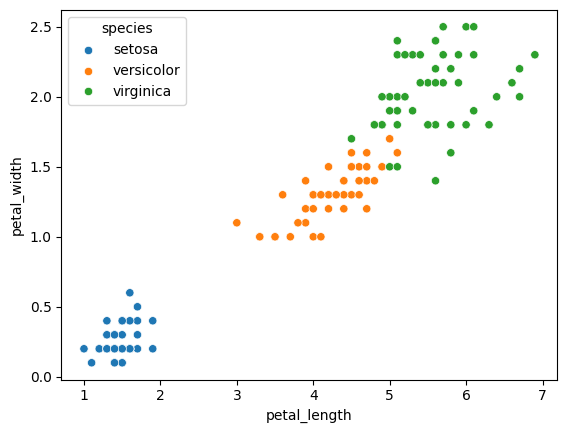

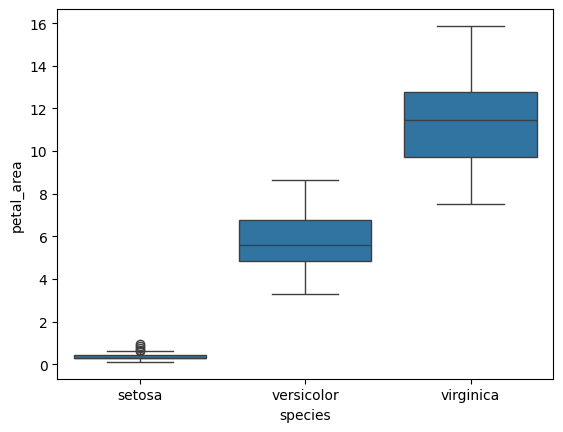

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv"
df = pd.read_csv(url)

print(df['species'].value_counts())
print(df.groupby('species')[['petal_length', 'petal_width']].mean())

sns.scatterplot(data=df, x='petal_length', y='petal_width', hue='species')
plt.show()

df['petal_area'] = df['petal_length'] * df['petal_width']
sns.boxplot(data=df, x='species', y='petal_area')
plt.show()
